# Non-human evaluation results
## Overall Success rate 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from typing import *
import seaborn as sns
import plotly.express as px
import time
import os
from collections import Counter
from math import pi
import pandas as pd
from statsmodels.stats.proportion import proportion_confint

In [2]:
def show_success_rate_mean(csv_file_name, drop_puzzle_index=None, see_round_index = None):

    tem_df = pd.read_csv(csv_file_name)
    puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
    result_dict = {}
    
    if drop_puzzle_index is not None and csv_file_name == 'human_result.csv':
        for drop_puzzle_name, drops in drop_puzzle_index.items():
            for cur_puzzle_index, drop_puzzle_round in drops:
                remove_row = tem_df[
                    (tem_df['puzzle_name'] == drop_puzzle_name) &
                    (tem_df['puzzle_index'] == cur_puzzle_index) &
                    (tem_df['round_index'] == drop_puzzle_round)
                ]
                tem_df = tem_df.drop(remove_row.index)
    
    for puzzle_name in puzzle_names:
        if puzzle_name == 'All':
            puzzle_df = tem_df.copy()
        else:
            puzzle_df = tem_df[tem_df['puzzle_name'] == puzzle_name]
    
        success_counts_level1 = 0
        total_counts_level1 = 0
        
        success_counts_level2_no_abduction = 0
        total_counts_level2_no_abduction = 0
        
        success_counts_level2_abduction = 0
        total_counts_level2_abduction = 0
        
        if see_round_index is not None:
            loop_round_index = see_round_index
        else:
            loop_round_index = list(range(1,6))
        for round_index in loop_round_index:
            cur_round_puzzle_df = puzzle_df[puzzle_df['round_index'] == round_index]
    
            if csv_file_name != 'human_result.csv':
                # Level 1
                level_1_df = cur_round_puzzle_df[cur_round_puzzle_df['puzzle_level'] == 1]
                level_1_success_count = len(level_1_df[level_1_df['solution_found'] == True])
                success_counts_level1 += level_1_success_count
                total_counts_level1 += len(level_1_df)
                
                # Level 2 without abduction
                level_2_no_abduction_df = cur_round_puzzle_df[
                    (cur_round_puzzle_df['puzzle_level'] == 2) &
                    (cur_round_puzzle_df['Do_abduction'] == False)
                ]
                level_2_no_abduction_success_count = len(level_2_no_abduction_df[level_2_no_abduction_df['solution_found'] == True])
                success_counts_level2_no_abduction += level_2_no_abduction_success_count
                total_counts_level2_no_abduction += len(level_2_no_abduction_df)
            
            # Level 2 with abduction
            level_2_abduction_df = cur_round_puzzle_df[
                (cur_round_puzzle_df['puzzle_level'] == 2) &
                (cur_round_puzzle_df['Do_abduction'] == True)
            ]
            level_2_abduction_success_count = len(level_2_abduction_df[level_2_abduction_df['solution_found'] == True])
            success_counts_level2_abduction += level_2_abduction_success_count
            total_counts_level2_abduction += len(level_2_abduction_df)
        
        if csv_file_name != 'human_result.csv':
            # Level 1
            mean_level1 = calculate_mean(success_counts_level1, total_counts_level1)
            # Level 2 no abduction
            mean_level2_no_abduction = calculate_mean(success_counts_level2_no_abduction, total_counts_level2_no_abduction)
            # Level 2 abduction
            mean_level2_abduction = calculate_mean(success_counts_level2_abduction, total_counts_level2_abduction)
            
            result_dict[puzzle_name] = [
                mean_level1,
                mean_level2_no_abduction,
                mean_level2_abduction
            ]
        else:
            # Level 2 abduction
            mean_level2_abduction = calculate_mean(success_counts_level2_abduction, total_counts_level2_abduction)
            result_dict[puzzle_name] = [
                mean_level2_abduction
            ]
                
    if csv_file_name != 'human_result.csv':
        split_names = ['Level1', 'Level2 no abduction', 'Level2 abduction']
    else:
        split_names = ['Level2 abduction']
    puzzle_types = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
    
    for index, split_name in enumerate(split_names):
        print(f'% {split_name}')  # 打印分割名称
        table_row = ''
        for puzzle_type in puzzle_types:
            mean = result_dict[puzzle_type][index]
            mean_percent = round(mean * 100, 2)
            table_row += f'${mean_percent}$ & '
        table_row = table_row.rstrip(' & ') + '\\\\'
        print(table_row)
        
def calculate_mean(success_counts, total_counts):

    if total_counts == 0:
        return 0.0
    return success_counts / total_counts

In [3]:
csv_file_name_list = [
                      'Meta_Llama_3_70B_Instruct_enhanced_100_final.csv', 
                      'gpt_4o_2024_05_13_enhanced_100_final.csv',               
                      'Meta_Llama_3_8B_Instruct_enhanced_100_final.csv',
                      'gpt_3.5_turbo_0125_enhanced_100_final.csv',
                      'gemma_7b_it_enhanced_100_final.csv',
                      'human_result.csv',
                      ]
Puzzle_subsample_dict = { # the puzzle indices that are tested on human
    'Function_operator_puzzles':[3, 4, 5, 7, 8, 11, 13, 15, 16, 17],
    'Art_gallery_puzzles':[1, 2, 4, 7, 10, 12, 13, 15, 17, 20],
    'Reactor_puzzles':[1, 3, 5, 7, 9, 11, 12, 14, 15, 19]
    }

drop_puzzle_index = {  # no puzzle dropped only used in data preprocess
    'Function_operator_puzzles':[
                                ],
    'Art_gallery_puzzles':[
                         ],
    'Reactor_puzzles':[
                      ]
    }

In [4]:
# Level1 for oracle setting
# Level2 no abduction for Baeline/React
# Level2 with abduction for IDEA
for csv_file_name in csv_file_name_list:
    print(f'''----------------------------------{csv_file_name}-----------------------------------------''')
    show_success_rate_mean(csv_file_name,see_round_index = [1,2,3,4,5])

----------------------------------Meta_Llama_3_70B_Instruct_enhanced_100_final.csv-----------------------------------------
% Level1
$32.67$ & $33.0$ & $48.0$ & $17.0$\\
% Level2 no abduction
$19.67$ & $33.0$ & $17.0$ & $9.0$\\
% Level2 abduction
$29.0$ & $41.0$ & $35.0$ & $11.0$\\
----------------------------------gpt_4o_2024_05_13_enhanced_100_final.csv-----------------------------------------
% Level1
$66.0$ & $77.0$ & $91.0$ & $30.0$\\
% Level2 no abduction
$43.33$ & $62.0$ & $45.0$ & $23.0$\\
% Level2 abduction
$50.33$ & $73.0$ & $51.0$ & $27.0$\\
----------------------------------Meta_Llama_3_8B_Instruct_enhanced_100_final.csv-----------------------------------------
% Level1
$5.67$ & $1.0$ & $14.0$ & $2.0$\\
% Level2 no abduction
$1.67$ & $0.0$ & $5.0$ & $0.0$\\
% Level2 abduction
$4.33$ & $7.0$ & $5.0$ & $1.0$\\
----------------------------------gpt_3.5_turbo_0125_enhanced_100_final.csv-----------------------------------------
% Level1
$6.33$ & $7.0$ & $11.0$ & $1.0$\\
% Level2

## Repeat action count

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_duplicate_action_count(cur_df):
    total_duplicate_action_count = 0
    total_steps = 0
    for index, row in cur_df.iterrows():
        row_mem_list = row['All_memories_str'].split('<New Row>')
        for single_memory in row_mem_list:
            if single_memory.startswith('You can still try'):
                row_mem_list.remove(single_memory)
        counts = Counter(row_mem_list)
        cur_puzzle_duplicates = sum(count - 1 for item, count in counts.items() if count > 1)
        total_duplicate_action_count += cur_puzzle_duplicates
    return total_duplicate_action_count/len(cur_df) # average repeat action count per puzzle
    
def print_action_repeat_count(csv_file_name, drop_puzzle_index = None):
    tem_df = pd.read_csv(csv_file_name)
    puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']

    tem_df = pd.read_csv(csv_file_name)
    puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
    result_dict = {}
    if drop_puzzle_index is not None and csv_file_name == 'human_result.csv':
        for item in drop_puzzle_index.items():
            drop_puzzle_name = item[0]
            for cur_puzzle_index, drop_puzzle_round in item[1]:
                remove_row = tem_df[(tem_df['puzzle_name'] == drop_puzzle_name) & (tem_df['puzzle_index'] == cur_puzzle_index) & (tem_df['round_index'] == drop_puzzle_round)]
                #print(len(tem_df))
                tem_df = tem_df.drop(remove_row.index)
                
    result_dict = {}

    for puzzle_name in puzzle_names:
        if puzzle_name == 'All':
            puzzle_df = tem_df.copy()
        else:
            puzzle_df = tem_df[tem_df['puzzle_name'] == puzzle_name]

        if csv_file_name != 'human_result.csv':
            level_1_df = puzzle_df[puzzle_df['puzzle_level'] == 1]

        
            level_2_no_abduction_df = puzzle_df[(puzzle_df['puzzle_level'] == 2) & (puzzle_df['Do_abduction'] == False)]

        
        level_2_abduction_df = puzzle_df[(puzzle_df['puzzle_level'] == 2) & (puzzle_df['Do_abduction'] == True)]
        if csv_file_name != 'human_result.csv':
            result_dict[puzzle_name] = [get_duplicate_action_count(level_1_df), get_duplicate_action_count(level_2_no_abduction_df), get_duplicate_action_count(level_2_abduction_df)]
        else:
            result_dict[puzzle_name] = [get_duplicate_action_count(level_2_abduction_df)]
    if csv_file_name != 'human_result.csv':
        split_names = ['Level1', 'Level2 no abduction', 'Level2 abduction']
    else:
        split_names = ['Level2 abduction']
    puzzle_types = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
    print(csv_file_name)
    for index, split_name in enumerate(split_names):
        print(f'% {split_name}') 
        table_row = ''
        for puzzle_type in puzzle_types:
            print(f'''Current puzzle_type: {puzzle_type}''')
            #print(result_dict[puzzle_type])
            table_row += f'& {round(result_dict[puzzle_type][index],2)}'
        print(table_row)

In [6]:
for csv_file_name in csv_file_name_list:
    print(f'''----------------------------------{csv_file_name}-----------------------------------------''')
    print_action_repeat_count(csv_file_name)

----------------------------------Meta_Llama_3_70B_Instruct_enhanced_100_final.csv-----------------------------------------
Meta_Llama_3_70B_Instruct_enhanced_100_final.csv
% Level1
Current puzzle_type: All
Current puzzle_type: Function_operator_puzzles
Current puzzle_type: Art_gallery_puzzles
Current puzzle_type: Reactor_puzzles
& 3.39& 2.47& 1.44& 6.25
% Level2 no abduction
Current puzzle_type: All
Current puzzle_type: Function_operator_puzzles
Current puzzle_type: Art_gallery_puzzles
Current puzzle_type: Reactor_puzzles
& 3.36& 1.25& 1.59& 7.23
% Level2 abduction
Current puzzle_type: All
Current puzzle_type: Function_operator_puzzles
Current puzzle_type: Art_gallery_puzzles
Current puzzle_type: Reactor_puzzles
& 1.73& 0.43& 0.72& 4.05
----------------------------------gpt_4o_2024_05_13_enhanced_100_final.csv-----------------------------------------
gpt_4o_2024_05_13_enhanced_100_final.csv
% Level1
Current puzzle_type: All
Current puzzle_type: Function_operator_puzzles
Current puzzle

## Accumulate solved puzzle plot

In [7]:
def read_accumulate_success_count_data(csv_file_name, drop_puzzle_index = None, Puzzle_subsample_dict = None):
    df = pd.read_csv(csv_file_name)
    if Puzzle_subsample_dict is not None:
        sub_dfs = []
        for item in Puzzle_subsample_dict.items():
            puzzle_name = item[0]
            subsample_puzzle_list = item[1]
            for puzzle_index in subsample_puzzle_list:
                select_sub_df = df[(df['puzzle_name'] == puzzle_name) & (df['puzzle_index'] == puzzle_index)]
                sub_dfs.append(select_sub_df)
        df = pd.concat(sub_dfs)
        
    if csv_file_name == 'human_result.csv':
        pass
    else:
        df = df[df['round_index'] == 1]
    
    if drop_puzzle_index is not None:
        df = tem_df = drop_index_data(df, drop_puzzle_index)
    Level_1_count_all = []
    
    Level_2_count_abduction = []    # regular abduction, Agent can choose when to abduct
    
    Level_2_count_no_abduction = []

    for i in range(16):
        finish_count_df = df[(df['finish_step_count']==i)&(df['solution_found']==True)]
        Level_1_result_finish_count_df = finish_count_df[finish_count_df['puzzle_level']==1]
        Level_1_count_all.append(len(Level_1_result_finish_count_df))

        Level_2_result_finish_count_no_abduction = finish_count_df[(finish_count_df['puzzle_level']==2)& (finish_count_df['Do_abduction']==False)]   
        Level_2_count_no_abduction.append(len(Level_2_result_finish_count_no_abduction))

        Level_2_result_finish_count_abduction = finish_count_df[(finish_count_df['puzzle_level']==2)& (finish_count_df['Do_abduction']==True)]
        Level_2_count_abduction.append(len(Level_2_result_finish_count_abduction))

    if csv_file_name == 'human_result.csv':

        return [i/5 for i in Level_1_count_all], [i/5 for i in Level_2_count_no_abduction], [i/5 for i in Level_2_count_abduction]
    else:
        return Level_1_count_all, Level_2_count_no_abduction, Level_2_count_abduction
    
def compare_accumulate_success_count_plot(csv_file_names, set_limit=False, save_plot=None, drop_puzzle_index=None, Puzzle_subsample_dict=None):
    plt.rcParams.update({'font.size': 15})  # Set global font size
    root_folder = 'figures'
    model_name_dict = {'gemma_7b_it_enhanced_100_final.csv': 'Gemma 7B',
                       'Meta_Llama_3_8B_Instruct_enhanced_100_final.csv': 'Llama3 8B',
                       'Meta_Llama_3_70B_Instruct_enhanced_100_final.csv': 'Llama3 70B',
                       'gpt_3.5_turbo_0125_enhanced_100_final.csv': 'GPT-3.5-turbo',
                       'gpt_4o_2024_05_13_enhanced_100_final.csv': 'GPT_4o',
                       'human_result.csv': "Human"
                      }
    markers = ['o', '^', 's', 'p', '*', 'd']  # Different markers for each model
    all_data = []
    for csv_file_name in csv_file_names:
        all_data.append(read_accumulate_success_count_data(csv_file_name, drop_puzzle_index=drop_puzzle_index, Puzzle_subsample_dict=Puzzle_subsample_dict))

    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=set_limit)
    axs = np.array([axs])  # Convert axs to a 2D array for consistent indexing

    x = np.arange(1, 16)
    handles, labels = [], []
    for z, label in enumerate(['Baseline agent', 'IDEA agent']):
        marker_iter = iter(markers)  # Iterator for markers
        for i, plot in enumerate(csv_file_names):
            cumsum_data = np.cumsum(all_data[i][z+1])
            if label in ['Baseline agent'] and plot == 'human_result.csv':
                continue
            marker = next(marker_iter)  # Get next marker
            line, = axs[0][z].plot(x, cumsum_data[:-1], marker=marker, markersize=12, label=f'{label} {plot}', linewidth=2)

            axs[0][z].set_xlabel('Interaction Step Count', fontsize=30)
            axs[0][z].set_ylabel('Cumulative Success Count', fontsize=30)
            axs[0][z].set_title(f'{label}', fontsize=30)
            axs[0][z].tick_params(axis='y', labelsize=20)
            axs[0][z].tick_params(axis='x', labelsize=20)

            if z == 1:  # Assuming you want legend entries from the third subplot
                handles.append(line)
                labels.append(f'{model_name_dict[plot]}')

    fig.legend(handles, labels, bbox_to_anchor=(0.905, 1.23), ncol=3, fontsize=30)

    if save_plot:
        if not os.path.exists(root_folder):
            os.makedirs(root_folder)
        plt.savefig(os.path.join(root_folder, save_plot) + '.pdf', format='pdf', bbox_inches='tight', dpi=300)

    plt.show()

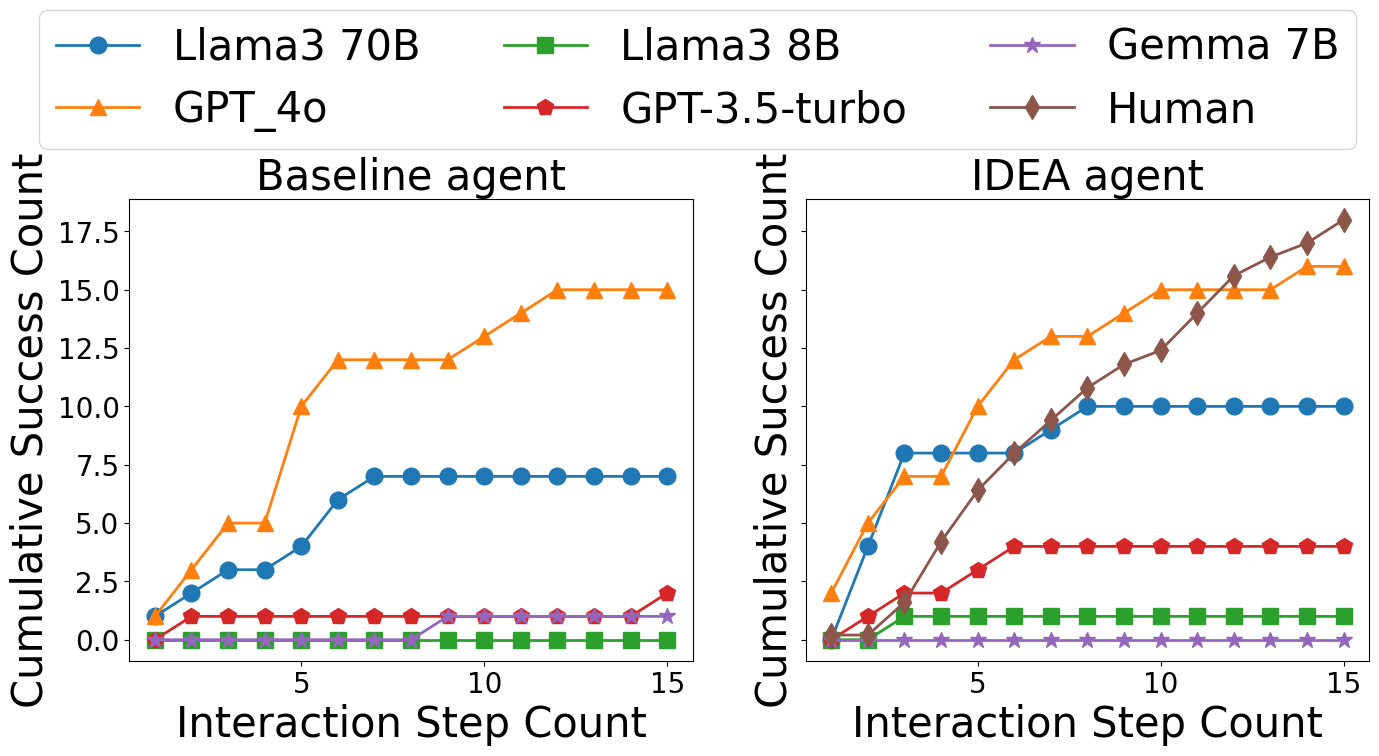

In [8]:
compare_accumulate_success_count_plot(csv_file_name_list, Puzzle_subsample_dict = Puzzle_subsample_dict,save_plot = 'Puzzle_solve_speed', set_limit = True)

Saving figure to: figures/radar_charts.pdf


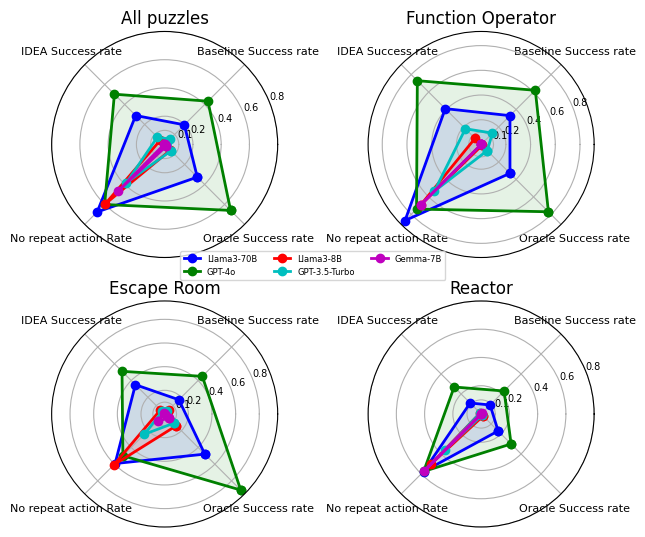

In [9]:
def radar_plot_new(csv_file_names, puzzle_names, save_fig=None):
    plt.rcParams.update({'font.size': 7})  
    root_folder = 'figures'
    metrics = ['Oracle Success rate', 
               'Baseline Success rate', 
               'IDEA Success rate', 
               #'Format Compliance Rate', 
               'No repeat action Rate']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    model_name_dict = {'gemma_7b_it_enhanced_100_final': 'Gemma-7B',
                       'Meta_Llama_3_8B_Instruct_enhanced_100_final': 'Llama3-8B',
                       'Meta_Llama_3_70B_Instruct_enhanced_100_final': 'Llama3-70B',
                       'gpt_3.5_turbo_0125_enhanced_100_final': 'GPT-3.5-Turbo',
                       'gpt_4o_2024_05_13_enhanced_100_final': 'GPT-4o',}
    title_name_dict = {'All':'All puzzles', 
                       'Function_operator_puzzles':'Function Operator', 
                       'Art_gallery_puzzles': 'Escape Room', 
                       'Reactor_puzzles': 'Reactor'}
    numeric_table = {}

    N = len(metrics)
    rotation_offset = np.radians(45)  # 45 degrees to radians
    angles = [(n / float(N) * 2 * np.pi - rotation_offset) % (2 * np.pi) for n in range(N)]
    angles += angles[:1]  # Close the radar chart loop

    fig, axs = plt.subplots(2, 2, figsize=(7, 7), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for puzzle_idx, puzzle_name in enumerate(puzzle_names):
        model_data = {}
        for csv_file_name in csv_file_names:
            model_name = csv_file_name.replace('.csv', '')
            csv_df = pd.read_csv(csv_file_name)
            model_metrics = {metric: [] for metric in metrics}

            cur_df = csv_df if puzzle_name == 'All' else csv_df[csv_df['puzzle_name'] == puzzle_name]

            for metric in metrics:
                if metric == 'Oracle Success rate':
                    tem_df = cur_df[cur_df['puzzle_level'] == 1]
                    value = len(tem_df[tem_df['solution_found'] == True]) / len(tem_df) if len(tem_df) > 0 else 0
                elif metric == 'Baseline Success rate': 
                    tem_df = cur_df[(cur_df['puzzle_level'] == 2) & (cur_df['Do_abduction'] == False)]
                    value = len(tem_df[tem_df['solution_found'] == True]) / len(tem_df) if len(tem_df) > 0 else 0
                elif metric == 'IDEA Success rate':
                    tem_df = cur_df[(cur_df['puzzle_level'] == 2) & (cur_df['Do_abduction'] == True)]
                    value = len(tem_df[tem_df['solution_found'] == True]) / len(tem_df) if len(tem_df) > 0 else 0
                #elif metric == 'Format Compliance Rate':
                #    value = 1 - (cur_df['get_action_index_error_count'].sum() + cur_df['get_action_value_error_count'].sum() + cur_df['return_action_call_index_error_count'].sum()) / cur_df['finish_step_count'].sum() if cur_df['finish_step_count'].sum() > 0 else 1
                elif metric == 'No repeat action Rate':
                    total_duplicate_action_count = 0
                    total_steps = 0
                    for index, row in cur_df.iterrows():
                        row_mem_list = row['All_memories_str'].split('<New Row>')
                        counts = Counter(row_mem_list)
                        cur_puzzle_duplicates = sum(count - 1 for item, count in counts.items() if count > 1)
                        total_duplicate_action_count += cur_puzzle_duplicates
                        total_steps += row['finish_step_count']
                    value = 1 - (total_duplicate_action_count / total_steps)
                
                model_metrics[metric].append(value)

            metrics_order = []
            for metric in metrics:
                metrics_order.extend(model_metrics[metric])
            model_data[model_name] = metrics_order

        
        for idx, (model_name, values) in enumerate(model_data.items()):
            values += values[:1]
            axs[puzzle_idx].plot(angles, values, 'o-', linewidth=2, label=model_name_dict[model_name], color=colors[idx % len(colors)])
            axs[puzzle_idx].fill(angles, values, alpha=0.1, color=colors[idx % len(colors)])
            axs[puzzle_idx].set_yticks([0.2, 0.4, 0.6,0.8,0.1])
        
        axs[puzzle_idx].set_xticks(angles[:-1], [metric for metric in metrics], color='black', size=8)
        axs[puzzle_idx].set_title(title_name_dict[puzzle_name], size=12, color='black', y=1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.36, 1.24), fontsize=6,ncol = 3)
    
    plt.subplots_adjust(hspace=0, wspace=0.4)  
    
    if save_fig:
        save_path = os.path.join(root_folder, save_fig + '.pdf')
        print("Saving figure to:", save_path)
        plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')

    plt.show()

# Usage example:
radar_name_list = [
                      'Meta_Llama_3_70B_Instruct_enhanced_100_final.csv',
                      'gpt_4o_2024_05_13_enhanced_100_final.csv',        
                      'Meta_Llama_3_8B_Instruct_enhanced_100_final.csv',
                      'gpt_3.5_turbo_0125_enhanced_100_final.csv',
                      'gemma_7b_it_enhanced_100_final.csv',
                      ]
radar_plot_new(radar_name_list, ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles'], save_fig='radar_charts')

# Human evaluation results

In [10]:
data_paths = ['data/evaluation_data/human_evaluation_test_0.csv',
              'data/evaluation_data/human_evaluation_test_1.csv',
              'data/evaluation_data/human_evaluation_test_2.csv',
              'data/evaluation_data/human_evaluation_human_participants.csv'] # evaluation data generated by co-authors
dfs = []
for path in data_paths:
    cur_df = pd.read_csv(path)
    dfs.append(cur_df)
human_evaluation_dfs = pd.concat(dfs)
gemma_7b_result = human_evaluation_dfs[human_evaluation_dfs['model_name'] == 'google_gemma-7b-it']
llama_8b_result = human_evaluation_dfs[human_evaluation_dfs['model_name'] == 'meta-llama_Meta-Llama-3-8B-Instruct']
llama_70b_result = human_evaluation_dfs[human_evaluation_dfs['model_name'] == 'meta-llama_Meta-Llama-3-70B-Instruct']
gpt_35_result = human_evaluation_dfs[human_evaluation_dfs['model_name'] == 'gpt-3.5-turbo-0125']
gpt_4o_result = human_evaluation_dfs[human_evaluation_dfs['model_name'] == 'gpt-4o-2024-05-13']
human_result = human_evaluation_dfs[human_evaluation_dfs['model_name'] == 'Human']
human_evaluation_data = {'Gemma-7B':gemma_7b_result,
                         'Llama3-8B':llama_8b_result,
                         'Llama3-70B':llama_70b_result,
                         'GPT-3.5-Turbo':gpt_35_result,
                         'GPT-4o':gpt_4o_result,
                         'Human': human_result}
def get_induction_data():
    induction_result = {}
    for model_name, evaluation_data in human_evaluation_data.items():
        puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
        cur_model_result = {}
        for puzzle_name in puzzle_names:
            if puzzle_name != 'All':
                cur_puzzle_df = evaluation_data[evaluation_data['puzzle_name'] == puzzle_name]
            else:
                cur_puzzle_df = evaluation_data
            total_induction_count = sum(cur_puzzle_df['total_action_count']) - len(cur_puzzle_df)
            total_effective_induction_count = sum(cur_puzzle_df['effective_induction_count'])
            effective_induction_per_puzzle = total_effective_induction_count/len(cur_puzzle_df)
            induction_per_puzzle = total_induction_count/len(cur_puzzle_df)
            if total_induction_count <= minmium_count:
                effective_induction_rate = None
            else:
                effective_induction_rate = round(total_effective_induction_count/total_induction_count,4)
                
            result_this_type_puzzle = {'total_induction_count':total_induction_count, 
                                       'total_effective_induction_count': total_effective_induction_count,
                                       'effective_induction_rate': effective_induction_rate,
                                       'effective_induction_per_puzzle': effective_induction_per_puzzle,
                                       'induction_per_puzzle': induction_per_puzzle
                                      }
            cur_model_result.update({puzzle_name: result_this_type_puzzle})
        
        induction_result.update({model_name: cur_model_result})
    return induction_result

def get_deduction_data():
    deduction_result = {}
    for model_name, evaluation_data in human_evaluation_data.items():
        puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
        cur_model_result = {}
        for puzzle_name in puzzle_names:
            if puzzle_name != 'All':
                cur_puzzle_df = evaluation_data[evaluation_data['puzzle_name'] == puzzle_name]
            else:
                cur_puzzle_df = evaluation_data
            total_induction_count = sum(cur_puzzle_df['total_action_count'])
            total_effective_induction_count = sum(cur_puzzle_df['deduction_plan_correctness_count'])
            effective_induction_per_puzzle = total_effective_induction_count/len(cur_puzzle_df)
            induction_per_puzzle = total_induction_count/len(cur_puzzle_df)
            if total_induction_count <= minmium_count:
                effective_induction_rate = None
            else:
                effective_induction_rate = round(total_effective_induction_count/total_induction_count,4)
                
            result_this_type_puzzle = {'total_deduction_count':total_induction_count, 
                                       'total_effective_deduction_count': total_effective_induction_count,
                                       'effective_deduction_rate': effective_induction_rate,
                                       'effective_deduction_per_puzzle': effective_induction_per_puzzle,
                                       'deduction_per_puzzle': induction_per_puzzle
                                      }
            cur_model_result.update({puzzle_name: result_this_type_puzzle})
        
        deduction_result.update({model_name: cur_model_result})
    return deduction_result

def get_abduction_data():
    overall_result = {}
    for model_name, evaluation_data in human_evaluation_data.items():
        puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
        cur_model_result = {}
        for puzzle_name in puzzle_names:
            if puzzle_name != 'All':
                cur_puzzle_df = evaluation_data[evaluation_data['puzzle_name'] == puzzle_name]
            else:
                cur_puzzle_df = evaluation_data
            abduction_correct_count = sum(cur_puzzle_df['abduction_correctness'])
            abduction_correct_rate = abduction_correct_count/len(cur_puzzle_df)
            this_puzzle_result = {'abduction_correct_count':abduction_correct_count,
                                  'abduction_correct_rate':abduction_correct_rate}
            cur_model_result.update({puzzle_name:this_puzzle_result})
        overall_result.update({model_name: cur_model_result})  
    return overall_result

def get_interactive_induction_step():

    result_csv_dict = {
        'Gemma-7B': 'gemma_7b_it_enhanced_100_final.csv',
        'Llama3-8B': 'Meta_Llama_3_8B_Instruct_enhanced_100_final.csv', 
        'Llama3-70B': 'Meta_Llama_3_70B_Instruct_enhanced_100_final.csv', 
        'GPT-3.5-Turbo': 'gpt_3.5_turbo_0125_enhanced_100_final.csv', 
        'GPT-4o': 'gpt_4o_2024_05_13_enhanced_100_final.csv', 
        'Human': 'human_result.csv'
    }
    overall_result = {}
    for model_name, evaluation_data in human_evaluation_data.items():
        puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
        cur_model_result = {}
        cur_result_csv_df = pd.read_csv(result_csv_dict[model_name])
        for puzzle_name in puzzle_names:
            if puzzle_name != 'All':
                cur_puzzle_df = evaluation_data[evaluation_data['puzzle_name'] == puzzle_name]
            else:
                cur_puzzle_df = evaluation_data
            
            puzzle_have_effective_induction_total_induction_count = 0
            puzzle_have_effective_induction_total_interactive_action_count = 0
            puzzle_have_effective_induction_number_count = 0

            puzzle_have_induction_total_induction_count = 0
            puzzle_have_induction_interactive_action_count = 0
            puzzle_have_induction_number_count = 0
            for index,row in cur_puzzle_df.iterrows():
                induction_step_count = row['inductive_count']
                puzzle_have_effective_induction = row['effective_induction_count'] > 0
                puzzle_have_induction = row['inductive_count'] > 0
                corresponding_row = cur_result_csv_df[(cur_result_csv_df['puzzle_name'] == row['puzzle_name'])&(cur_result_csv_df['puzzle_index'] == row['puzzle_index'])&(cur_result_csv_df['round_index'] == row['round_index'])&(cur_result_csv_df['Do_abduction'] == True)]
                assert len(corresponding_row) == 1, f'''current row {row} found multiple row in the reuslt df {len(corresponding_row)} {corresponding_row}'''
                corresponding_row = corresponding_row.iloc[0]
                if puzzle_have_effective_induction:
                    induction_list = corresponding_row['Abduction_distrubution'].split('<step>')
                    total_interactive_action = int(induction_list[-1])
                    puzzle_have_effective_induction_total_induction_count += row['effective_induction_count']
                    puzzle_have_effective_induction_total_interactive_action_count += total_interactive_action
                    puzzle_have_effective_induction_number_count += 1

                if puzzle_have_induction:
                    induction_list = corresponding_row['Abduction_distrubution'].split('<step>')
                    total_interactive_action = int(induction_list[-1])
                    puzzle_have_induction_total_induction_count += row['inductive_count']
                    puzzle_have_induction_interactive_action_count += total_interactive_action
                    puzzle_have_induction_number_count += 1
             
            if puzzle_have_effective_induction_total_induction_count <= minmium_count:
                average_interactive_action_per_effective_induction = None # no effective induction when solving this puzzle
            else:
                average_interactive_action_per_effective_induction = round(puzzle_have_effective_induction_total_interactive_action_count/puzzle_have_effective_induction_total_induction_count, 4)
            
            if puzzle_have_induction_total_induction_count <= minmium_count:
                average_interactive_action_per_induction = None # no induction when solving this puzzle
            else:
                average_interactive_action_per_induction = round(puzzle_have_induction_interactive_action_count/puzzle_have_induction_total_induction_count, 4)
            this_puzzle_result = {'average_interactive_action_per_effective_induction':average_interactive_action_per_effective_induction,
                                  'average_interactive_action_per_induction':average_interactive_action_per_induction,
                                 }
            cur_model_result.update({puzzle_name:this_puzzle_result})
        overall_result.update({model_name: cur_model_result})
    return overall_result

def plot_overall_result(induction_data, deduction_data, abduction_data, average_interaction_data, save_plot = None):

    # Set the seaborn style
    sns.set(style="whitegrid")

    subplot_labels = ['(a)', '(b)', '(c)', '(d)']
    label_x = 0  # X位置设置为轴边界的外部
    label_y = 1.2  # Y位置设置为轴边界的顶部稍上
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust space between plots
    title_font_size  = 20
    label_font_size = 17
    tick_label_font_size = 16
    index_font_size = 25
    plt.rcParams.update({'font.size': 20})
    y_limits = {
        'induction': (0, 0.8),  # Example limits for Effective Induction Rate
        'deduction': (0, 0.8),  # Example limits for Effective Deduction Rate
        'abduction': (0, 0.8),  # Example limits for Abduction Correct Rate
        'interaction': (0, 10)  # Example limits for Average Interactive Actions
    }
    puzzle_name_dict = {
        'Function_operator_puzzles': 'Function Operator',
        'Art_gallery_puzzles': "Escape Room", 
        'Reactor_puzzles': "Reactor",
        'All': "All"
    }

    # ------------------------------------
    # Plot 1: Abduction Correct Rate (moved to (0, 0))
    # ------------------------------------
    rows = []
    for model_name, puzzles in abduction_data.items():
        for puzzle_name, metrics in puzzles.items():
            row = {
                'Model': model_name,
                'Puzzle_Type': puzzle_name_dict[puzzle_name],
                'abduction_correct_count': metrics['abduction_correct_count'],
                'abduction_correct_rate': metrics['abduction_correct_rate']
            }
            rows.append(row)
    df_abduction = pd.DataFrame(rows)

    sns.barplot(
        data=df_abduction,
        x='Puzzle_Type',
        y='abduction_correct_rate',
        hue='Model',
        ax=axes[0, 0]
    )
    axes[0, 0].set_title('Abduction Correct Rate by Model and Puzzle Type', fontsize=title_font_size)
    axes[0, 0].set_ylabel('Abduction Correct Rate', fontsize=label_font_size)
    axes[0, 0].set_xlabel('Puzzle Type', fontsize=label_font_size)
    axes[0, 0].set_ylim(*y_limits['abduction'])
    axes[0, 0].tick_params(axis='x', labelsize=tick_label_font_size)
    axes[0, 0].tick_params(axis='y', labelsize=tick_label_font_size)
    axes[0, 0].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 0].text(label_x, label_y, subplot_labels[0], transform=axes[0, 0].transAxes, fontsize=index_font_size, weight='bold', va='top', ha='right')

    # ------------------------------------
    # Plot 2: Effective Deduction Rate
    # ------------------------------------
    rows = []
    for model_name, puzzles in deduction_data.items():
        for puzzle_name, metrics in puzzles.items():
            row = {'Model': model_name, 'Puzzle_Type': puzzle_name_dict[puzzle_name]}
            row.update(metrics)
            rows.append(row)
    df_deduction = pd.DataFrame(rows)
    df_deduction['effective_deduction_rate'] = df_deduction['effective_deduction_rate'].replace({None: pd.NA})
    df_deduction['effective_deduction_rate'] = pd.to_numeric(df_deduction['effective_deduction_rate'])

    sns.barplot(
        data=df_deduction,
        x='Puzzle_Type',
        y='effective_deduction_rate',
        hue='Model',
        ax=axes[0, 1]
    )
    axes[0, 1].set_title('Effective Deduction Rate by Model and Puzzle Type', fontsize=title_font_size)
    axes[0, 1].set_ylabel('Effective Deduction Rate', fontsize=label_font_size)
    axes[0, 1].set_xlabel('Puzzle Type', fontsize=label_font_size)
    axes[0, 1].set_ylim(*y_limits['deduction'])

    axes[0, 1].tick_params(axis='x', labelsize=tick_label_font_size)
    axes[0, 1].tick_params(axis='y', labelsize=tick_label_font_size)
    axes[0, 1].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0, 1].text(label_x, label_y, subplot_labels[1], transform=axes[0, 1].transAxes, fontsize=index_font_size, weight='bold', va='top', ha='right')

    # ------------------------------------
    # Plot 3: Effective Induction Rate (moved to (1, 0))
    # ------------------------------------
    rows = []
    for model_name, puzzles in induction_data.items():
        for puzzle_name, metrics in puzzles.items():
            row = {'Model': model_name, 'Puzzle_Type': puzzle_name_dict[puzzle_name]}
            row.update(metrics)
            rows.append(row)
    df_induction = pd.DataFrame(rows)
    df_induction['effective_induction_rate'] = df_induction['effective_induction_rate'].replace({None: pd.NA})
    df_induction['effective_induction_rate'] = pd.to_numeric(df_induction['effective_induction_rate'])

    sns.barplot(
        data=df_induction,
        x='Puzzle_Type',
        y='effective_induction_rate',
        hue='Model',
        ax=axes[1, 0]
    )
    axes[1, 0].set_title('Effective Induction Rate by Model and Puzzle Type', fontsize=title_font_size)
    axes[1, 0].set_ylabel('Effective Induction Rate', fontsize=label_font_size)
    axes[1, 0].set_xlabel('Puzzle Type', fontsize=label_font_size)
    axes[1, 0].set_ylim(*y_limits['induction'])
    axes[1, 0].tick_params(axis='x', labelsize=tick_label_font_size)
    axes[1, 0].tick_params(axis='y', labelsize=tick_label_font_size)
    axes[1, 0].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 0].text(label_x, label_y, subplot_labels[2], transform=axes[1, 0].transAxes, fontsize=index_font_size, weight='bold', va='top', ha='right')
    # ------------------------------------
    # Plot 4: Average Interactive Actions per Effective Induction
    # ------------------------------------
    rows = []
    for model_name, puzzles in average_interaction_data.items():
        for puzzle_name, metrics in puzzles.items():
            row = {
                'Model': model_name,
                'Puzzle_Type': puzzle_name_dict[puzzle_name],
                'Average Interactive Action per Effective Induction': metrics['average_interactive_action_per_effective_induction'],
                'Average Interactive Action per Induction': metrics['average_interactive_action_per_induction']
            }
            rows.append(row)
    df_interaction = pd.DataFrame(rows)
    df_interaction['Average Interactive Action per Effective Induction'] = df_interaction['Average Interactive Action per Effective Induction'].replace({None: pd.NA})
    df_interaction['Average Interactive Action per Effective Induction'] = pd.to_numeric(df_interaction['Average Interactive Action per Effective Induction'])

    sns.barplot(
        data=df_interaction,
        x='Puzzle_Type',
        y='Average Interactive Action per Effective Induction',
        hue='Model',
        ax=axes[1, 1]
    )
    axes[1, 1].set_title('Avg. Interactive Actions per Effective Induction', fontsize=title_font_size)
    axes[1, 1].set_ylabel('Avg. Actions per Effective Induction', fontsize=label_font_size)
    axes[1, 1].set_xlabel('Puzzle Type', fontsize=label_font_size)
    axes[1, 1].set_ylim(*y_limits['interaction'])
    axes[1, 1].tick_params(axis='x', labelsize=tick_label_font_size)
    axes[1, 1].tick_params(axis='y', labelsize=tick_label_font_size)
    axes[1, 1].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 1].text(label_x, label_y, subplot_labels[3], transform=axes[1, 1].transAxes, fontsize=index_font_size, weight='bold', va='top', ha='right')

    # ------------------------------------
    # Adjust Legends and Layout
    # ------------------------------------
    # Remove duplicate legends
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1, 1.07), ncol=3, fontsize=15)

    # Remove legends from individual plots
    for ax in axes.flat:
        ax.get_legend().remove()
    plt.tight_layout()
    if save_plot:
        root_folder = 'figures'
        plt.savefig(os.path.join(root_folder, save_plot) + '.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    

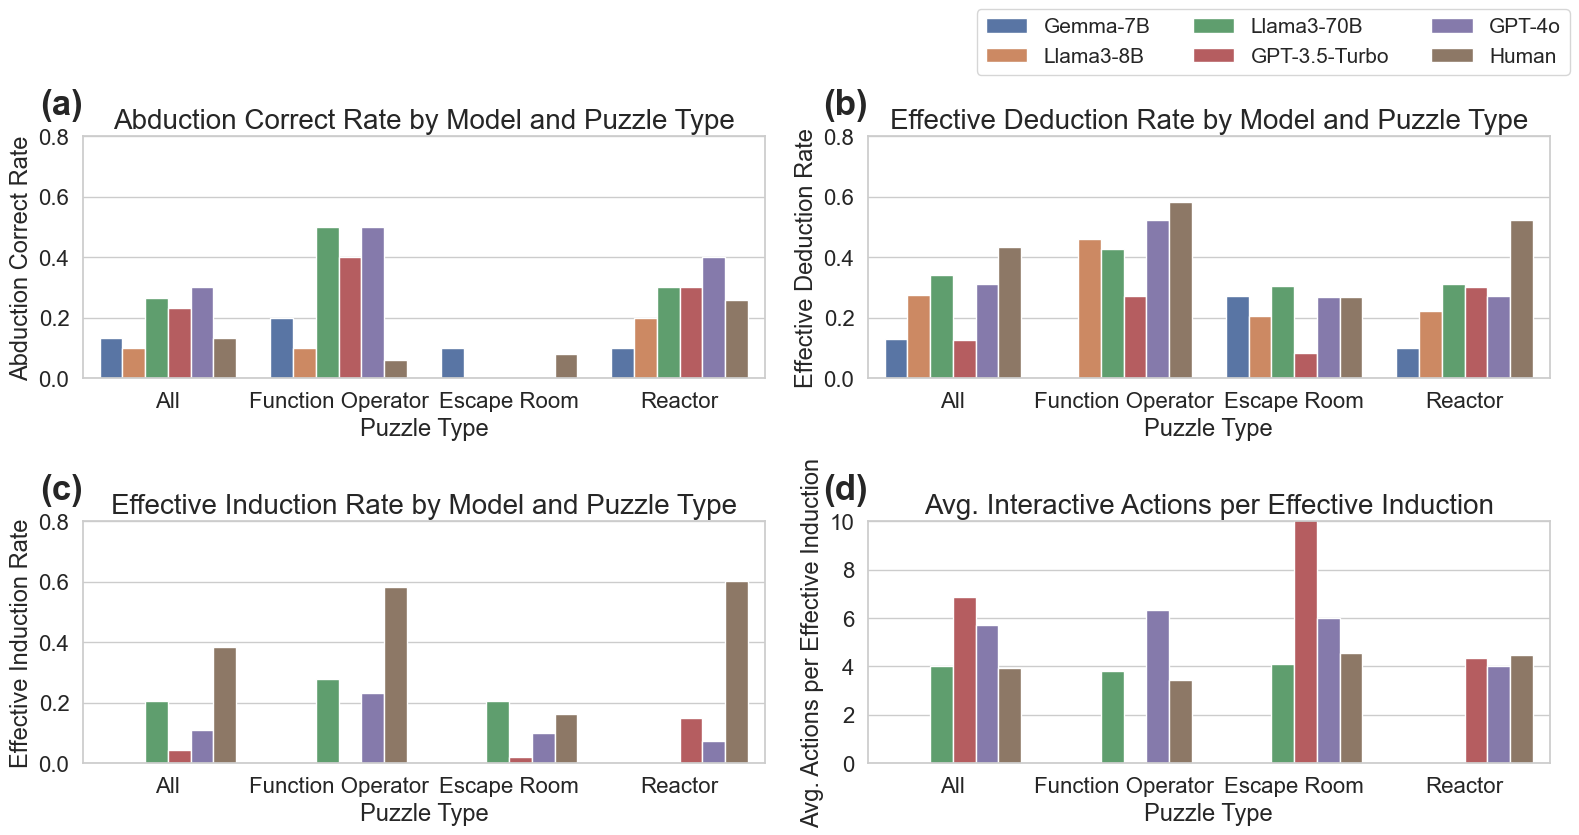

In [11]:
minmium_count = 1
induction_data = get_induction_data()
deduction_data = get_deduction_data()
abduction_data = get_abduction_data()
average_interaction_data = get_interactive_induction_step()
plot_overall_result(induction_data, deduction_data, abduction_data, average_interaction_data, save_plot = 'human_evaluation_result')

In [12]:
import matplotlib
def get_rule_found_data():
    overall_result = {}
    for model_name, evaluation_data in human_evaluation_data.items():
        puzzle_names = ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']
        cur_model_result = {}
        for puzzle_name in puzzle_names:
            if puzzle_name != 'All':
                cur_puzzle_df = evaluation_data[evaluation_data['puzzle_name'] == puzzle_name]
            else:
                cur_puzzle_df = evaluation_data
            rule_not_found_count = 0
            rule_found_with_abduction_count = 0
            rule_found_after_induction = 0
            total_induction_steps_to_rule = 0
            for index,row in cur_puzzle_df.iterrows():
                if row['steps_to_correct_rule'] == 0:
                    rule_found_with_abduction_count += 1
                elif row['steps_to_correct_rule'] == 9999:
                    rule_not_found_count += 1
                else:
                    rule_found_after_induction += 1
                    total_induction_steps_to_rule += row['steps_to_correct_rule']
             
            if rule_found_after_induction == 0:
                average_induction_step_to_rule = None
            else:
                average_induction_step_to_rule = round(total_induction_steps_to_rule/rule_found_after_induction,4) 
            this_puzzle_result = {'rule_not_found_count':rule_not_found_count,
                                  'rule_found_rate':round(1 - rule_not_found_count/len(cur_puzzle_df),4),
                                  'rule_found_with_abduction_count':rule_found_with_abduction_count,
                                  'rule_found_with_abduction_rate':round(rule_found_with_abduction_count/len(cur_puzzle_df),4),
                                  'rule_found_after_induction':rule_found_after_induction,
                                  'rule_found_after_induction_rate':round(rule_found_after_induction/len(cur_puzzle_df),4),
                                  'average_induction_step_to_rule':average_induction_step_to_rule}
            cur_model_result.update({puzzle_name:this_puzzle_result})
        overall_result.update({model_name: cur_model_result})
    return overall_result

def plot_rule_found_data(rule_found_data, save_plot = None):
    title_font_size = 20
    label_font_size = 17
    tick_label_font_size = 16

    plt.rcParams.update({'font.size': 20})

    # Prepare the data
    puzzle_name_dict = {
        'Function_operator_puzzles': 'Function Operator',
        'Art_gallery_puzzles': 'Escape Room',
        'Reactor_puzzles': 'Reactor',
        'All': 'All'
    }
    rows = []
    for model_name, puzzles in rule_found_data.items():
        for puzzle_name, metrics in puzzles.items():
            row = {
                'Model': model_name,
                'Puzzle_Type': puzzle_name_dict[puzzle_name],
                'With_Abduction': metrics['rule_found_with_abduction_rate'],
                'After_Induction': metrics['rule_found_after_induction_rate']
            }
            rows.append(row)
    df = pd.DataFrame(rows)

    # Set the seaborn style
    sns.set(style="whitegrid")

    # Define the order of models and puzzle types for consistent plotting
    model_order = df['Model'].unique()
    puzzle_order = [puzzle_name_dict[name] for name in ['All', 'Function_operator_puzzles', 'Art_gallery_puzzles', 'Reactor_puzzles']]  # 使用转换后的名称

    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Define bar width and positions
    num_models = len(model_order)
    bar_width = 0.8 / num_models  # Total width for all models per puzzle
    indices = np.arange(len(puzzle_order))

    # Define a color palette with lower brightness and higher saturation
    palette = sns.color_palette("deep", num_models)

    # Plot each model's data
    for i, (model, color) in enumerate(zip(model_order, palette)):
        model_data = df[df['Model'] == model].set_index('Puzzle_Type').reindex(puzzle_order)
        
        # Calculate bar positions for this model
        bar_positions = indices - 0.4 + (i + 0.5) * bar_width
        
        # Plot the 'With Abduction' segment
        ax.bar(bar_positions, model_data['After_Induction'], bar_width, label=f'{model} - After Abduction',
               color=color, edgecolor='black', linewidth=0.8)
        
        # Plot the 'After Induction' segment on top of 'With Abduction'
        ax.bar(bar_positions, model_data['With_Abduction'], bar_width, bottom=model_data['After_Induction'],
               label=f'{model} - With Induction', color=color, alpha=0.5)

    # Set the x-axis labels and ticks
    ax.set_xlabel('Puzzle Type', fontsize=label_font_size)
    ax.set_ylabel('Rule Found Rate', fontsize=label_font_size)
    ax.set_title('Rule Found Rate by Model and Puzzle Type', fontsize=title_font_size)
    ax.set_xticks(indices)
    ax.set_xticklabels(puzzle_order, ha='right', fontsize=tick_label_font_size)
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.05))

    # Create a custom legend
    handles, labels = ax.get_legend_handles_labels()
    # Remove duplicate labels
    by_label = dict(zip(labels, handles))
    fig.legend(handles, labels, bbox_to_anchor=(1, 1.15), ncol=3, fontsize=15)

    plt.tight_layout()
    if save_plot:
        root_folder = 'figures'
        plt.savefig(os.path.join(root_folder, save_plot) + '.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()

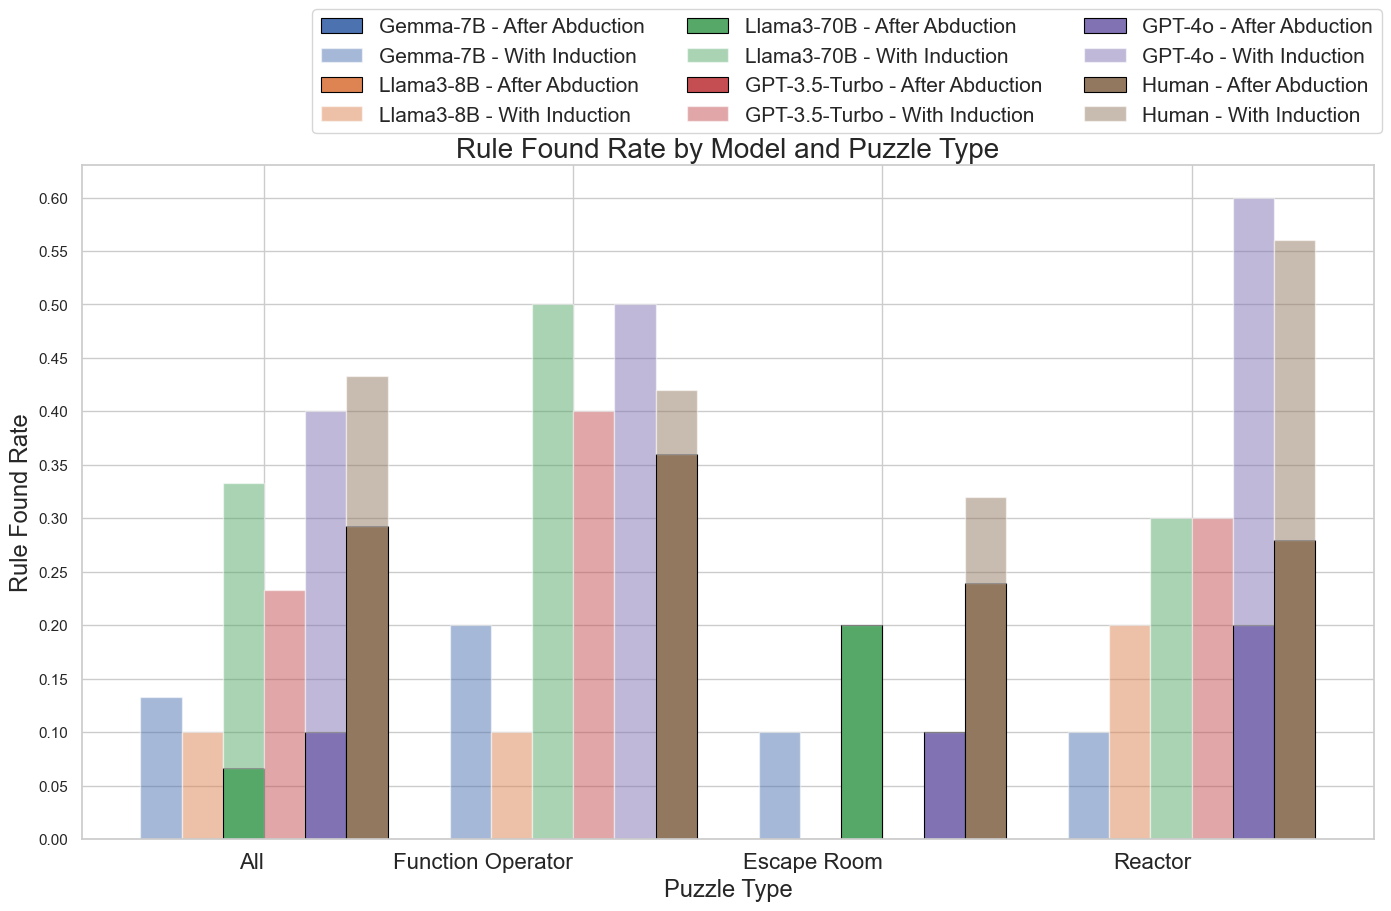

In [13]:
# new
plot_rule_found_data(get_rule_found_data(), 'rule_found_figure')